In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
SPOTIPY_CLIENT_ID='fcbb0f29936b4f8ba90c4a606e516a67'
SPOTIPY_CLIENT_SECRET='9b66b9a7c4ec4f2ba5fe21b6575da778'

In [3]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Searching Tracks

In [4]:
results = sp.search(q='track:'+'baby',type='track')

In [5]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Ababy&type=track&offset=0&limit=10',
 'items': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6Cqtx9fpxzggIMuKn0RGCp'},
      'href': 'https://api.spotify.com/v1/artists/6Cqtx9fpxzggIMuKn0RGCp',
      'id': '6Cqtx9fpxzggIMuKn0RGCp',
      'name': 'Dream Supplier',
      'type': 'artist',
      'uri': 'spotify:artist:6Cqtx9fpxzggIMuKn0RGCp'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/48zEowASEXWsK6lgP1xotZ'},
      'href': 'https://api.spotify.com/v1/artists/48zEowASEXWsK6lgP1xotZ',
      'id': '48zEowASEXWsK6lgP1xotZ',
      'name': 'Baby Sleeps',
      'type': 'artist',
      'uri': 'spotify:artist:48zEowASEXWsK6lgP1xotZ'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/1QGkiMbmTOmuxOSeyRJEIl'},
      'href': 'https://api.spotify.com/v1/artists/1QGkiMbmTOmuxOSeyRJEIl',
      'id': '1QGkiMbmTOmuxOSeyRJEIl',
      'na

In [6]:
print(len(results['tracks']))

7


In [7]:
results['tracks']['items']

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6Cqtx9fpxzggIMuKn0RGCp'},
     'href': 'https://api.spotify.com/v1/artists/6Cqtx9fpxzggIMuKn0RGCp',
     'id': '6Cqtx9fpxzggIMuKn0RGCp',
     'name': 'Dream Supplier',
     'type': 'artist',
     'uri': 'spotify:artist:6Cqtx9fpxzggIMuKn0RGCp'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/48zEowASEXWsK6lgP1xotZ'},
     'href': 'https://api.spotify.com/v1/artists/48zEowASEXWsK6lgP1xotZ',
     'id': '48zEowASEXWsK6lgP1xotZ',
     'name': 'Baby Sleeps',
     'type': 'artist',
     'uri': 'spotify:artist:48zEowASEXWsK6lgP1xotZ'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/1QGkiMbmTOmuxOSeyRJEIl'},
     'href': 'https://api.spotify.com/v1/artists/1QGkiMbmTOmuxOSeyRJEIl',
     'id': '1QGkiMbmTOmuxOSeyRJEIl',
     'name': 'Granular Noise',
     'type': 'artist',
     'uri': 'spotify:artist:1QGkiMbmTOmuxOSeyRJEIl'}],
   'available_marke

In [8]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

Clean Baby Sleep White Noise (Loopable) - By - Dream Supplier
Track ID: 0zirWZTcXBBwGsevrsIpvT / Artist ID - 6Cqtx9fpxzggIMuKn0RGCp
------
Drip Too Hard (Lil Baby & Gunna) - By - Lil Baby
Track ID: 78QR3Wp35dqAhFEc2qAGjE / Artist ID - 5f7VJjfbwm532GiveGC0ZK
------
Wants and Needs (feat. Lil Baby) - By - Drake
Track ID: 65OVbaJR5O1RmwOQx0875b / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Baby Don't Hurt Me - By - David Guetta
Track ID: 3BKD1PwArikchz2Zrlp1qi / Artist ID - 1Cs0zKBU1kc0i8ypK3B9ai
------
Baby (Lil Baby feat. DaBaby) - By - Quality Control
Track ID: 5MPPttjfGap2C6j6eKcO6J / Artist ID - 6i392l38cR3uBPF0DbNs7S
------
Babydoll - By - Dominic Fike
Track ID: 7yNf9YjeO5JXUE3JEBgnYc / Artist ID - 6USv9qhCn6zfxlBQIYJ9qs
------
Surround Sound (feat. 21 Savage & Baby Tate) - By - JID
Track ID: 1udwFobQ1JoOdWPQrp2b6u / Artist ID - 6U3ybJ9UHNKEdsH7ktGBZ7
------
Bluffin (feat. Lil Baby) - By - Gucci Mane
Track ID: 1hS8xbWKEifaf0VuFpIY69 / Artist ID - 13y7CgLHjMVRMDqxdx0Xdo
------
Brooklyn

In [9]:
song_id = '37Nqx7iavZpotJSDXZWbJ3'

# Generating token for recommendation

In [10]:
import requests
import base64

In [11]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [12]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)

In [13]:
token

'BQCYRSIQfPz19yMiMwsxlWd7fsYZnfFvDElWdqc8zESG7E38Lg7S1gHPc765LL6IGPQMbNm42nVbFMhu76exZ2zXmY-3-XglzP7X9AVud36apv9wDvo'

# Getting recommendation based on song

In [14]:
def get_track_recommendations(seed_tracks,token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [15]:
json_response = get_track_recommendations(song_id,token)

In [16]:
json_response

{'tracks': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'},
      'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x',
      'id': '5K4W6rqBFWDnAN6FQUkS6x',
      'name': 'Kanye West',
      'type': 'artist',
      'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'ET',
     'FI',
     'FJ',
     'FM',
     'FR',
  

In [17]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"No Child Left Behind" by(Kanye West)
"Don't" by(Bryson Tiller)
"The Way Life Goes (feat. Oh Wonder)" by(Lil Uzi Vert)
"THE NEWS" by(PARTYNEXTDOOR)
"The Thrill" by(Wiz Khalifa)
"What's My Name?" by(Rihanna)
"Jumbotron Shit Poppin" by(Drake)
"SaintLaurentYSL - The Martinez Brothers Re-Edit" by(Lil Yachty)
"Track Star" by(Mooski)
"BELIEVE IT" by(PARTYNEXTDOOR)


In [18]:
recolist = json_response['tracks']
print(len(recolist))

10


In [19]:
recolist[0]

{'album': {'album_type': 'ALBUM',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'},
    'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x',
    'id': '5K4W6rqBFWDnAN6FQUkS6x',
    'name': 'Kanye West',
    'type': 'artist',
    'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
 

In [20]:
import pandas as pd

In [21]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,178061,False,{'isrc': 'USUM72116303'},{'spotify': 'https://open.spotify.com/track/3h...,https://api.spotify.com/v1/tracks/3hd6zLhnTlbJ...,3hd6zLhnTlbJ8PupYt3cAI,False,No Child Left Behind,65,None,23,track,spotify:track:3hd6zLhnTlbJ8PupYt3cAI
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,198293,True,{'isrc': 'USRC11501051'},{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pXF1nA74528...,3pXF1nA74528Edde4of9CC,False,Don't,86,https://p.scdn.co/mp3-preview/f7e8de8a2a419c43...,5,track,spotify:track:3pXF1nA74528Edde4of9CC
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,221746,True,{'isrc': 'USAT21703429'},{'spotify': 'https://open.spotify.com/track/2e...,https://api.spotify.com/v1/tracks/2eAZfqOm4EnO...,2eAZfqOm4EnOF9VvN50Tyc,False,The Way Life Goes (feat. Oh Wonder),83,https://p.scdn.co/mp3-preview/80d5a005febd46fd...,5,track,spotify:track:2eAZfqOm4EnOF9VvN50Tyc
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,267384,False,{'isrc': 'USWB11902977'},{'spotify': 'https://open.spotify.com/track/4S...,https://api.spotify.com/v1/tracks/4SINLKyKC7s6...,4SINLKyKC7s6RAWKGB7mMt,False,THE NEWS,69,https://p.scdn.co/mp3-preview/acd9396c53049739...,3,track,spotify:track:4SINLKyKC7s6RAWKGB7mMt
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,234333,True,{'isrc': 'USA2P2033760'},{'spotify': 'https://open.spotify.com/track/56...,https://api.spotify.com/v1/tracks/56oGoEjA9eTZ...,56oGoEjA9eTZYgsttEFKY3,False,The Thrill,80,https://p.scdn.co/mp3-preview/a58bed89be204e61...,1,track,spotify:track:56oGoEjA9eTZYgsttEFKY3
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,263173,True,{'isrc': 'USUM71025031'},{'spotify': 'https://open.spotify.com/track/6D...,https://api.spotify.com/v1/tracks/6DkXLzBQT7cw...,6DkXLzBQT7cwXmTyzAB1DJ,False,What's My Name?,75,None,2,track,spotify:track:6DkXLzBQT7cwXmTyzAB1DJ
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,137151,True,{'isrc': 'USUG12208610'},{'spotify': 'https://open.spotify.com/track/2Z...,https://api.spotify.com/v1/tracks/2ZlABhxMMa43...,2ZlABhxMMa43COmZ97kKsJ,False,Jumbotron Shit Poppin,77,None,13,track,spotify:track:2ZlABhxMMa43COmZ97kKsJ
7,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,363636,True,{'isrc': 'USUG12000080'},{'spotify': 'https://open.spotify.com/track/4Y...,https://api.spotify.com/v1/tracks/4Yhq45AkxUJz...,4Yhq45AkxUJzKPucSfGN9Y,False,SaintLaurentYSL - The Martinez Brothers Re-Edit,54,None,1,track,spotify:track:4Yhq45AkxUJzKPucSfGN9Y
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,199723,True,{'isrc': 'QZHN62072414'},{'spotify': 'https://open.spotify.com/track/1W...,https://api.spotify.com/v1/tracks/1W1kOLMIYoX1...,1W1kOLMIYoX1GaVdoCj5Nt,False,Track Star,47,None,3,track,spotify:track:1W1kOLMIYoX1GaVdoCj5Nt
9,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify'

In [22]:
reco_df = recommendation_result[['name', 'explicit', 'duration_ms', 'popularity']]

In [23]:
reco_df

,name,explicit,duration_ms,popularity
0,No Child Left Behind,False,178061,65
1,Don't,True,198293,86
2,The Way Life Goes (feat. Oh Wonder),True,221746,83
3,THE NEWS,False,267384,69
4,The Thrill,True,234333,80
5,What's My Name?,True,263173,75
6,Jumbotron Shit Poppin,True,137151,77
7,SaintLaurentYSL - The Martinez Brothers Re-Edit,True,363636,54
8,Track Star,True,199723,47
9,BELIEVE IT,True,183219,72


In [24]:
reco_df.describe()

,duration_ms,popularity
count,10.000000,10.000000
mean,224671.900000,70.800000
std,62883.223209,12.505999
min,137151.000000,47.000000
25%,186987.500000,66.000000
50%,210734.500000,73.500000
75%,255963.000000,79.250000
max,363636.000000,86.000000


In [25]:
reco_df.dtypes

name           object
explicit         bool
duration_ms     int64
popularity      int64
dtype: object

In [26]:
reco_df['explicit']

0    False
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8     True
9     True
Name: explicit, dtype: bool

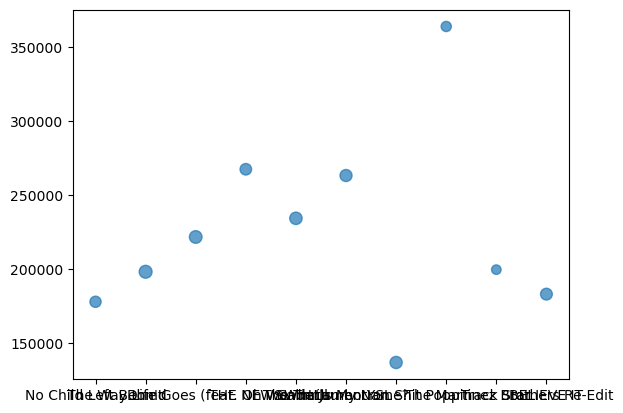

In [27]:
import matplotlib.pyplot as plt
import numpy as np

    
x = reco_df['name']
y = reco_df['duration_ms']
s = reco_df['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
# show the graph
plt.show()

In [28]:
reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)

C:\Users\Shambhavi Mishra\AppData\Local\Temp\ipykernel_19876\1959306096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)


In [29]:
reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

C:\Users\Shambhavi Mishra\AppData\Local\Temp\ipykernel_19876\3481783179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)


In [30]:
reco_df

,name,explicit,duration_ms,popularity,duration_min,popularity_range
0,No Child Left Behind,False,178061,65,178.0,19
1,Don't,True,198293,86,198.0,40
2,The Way Life Goes (feat. Oh Wonder),True,221746,83,222.0,37
3,THE NEWS,False,267384,69,267.0,23
4,The Thrill,True,234333,80,234.0,34
5,What's My Name?,True,263173,75,263.0,29
6,Jumbotron Shit Poppin,True,137151,77,137.0,31
7,SaintLaurentYSL - The Martinez Brothers Re-Edit,True,363636,54,364.0,8
8,Track Star,True,199723,47,200.0,1
9,BELIEVE IT,True,183219,72,183.0,26


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


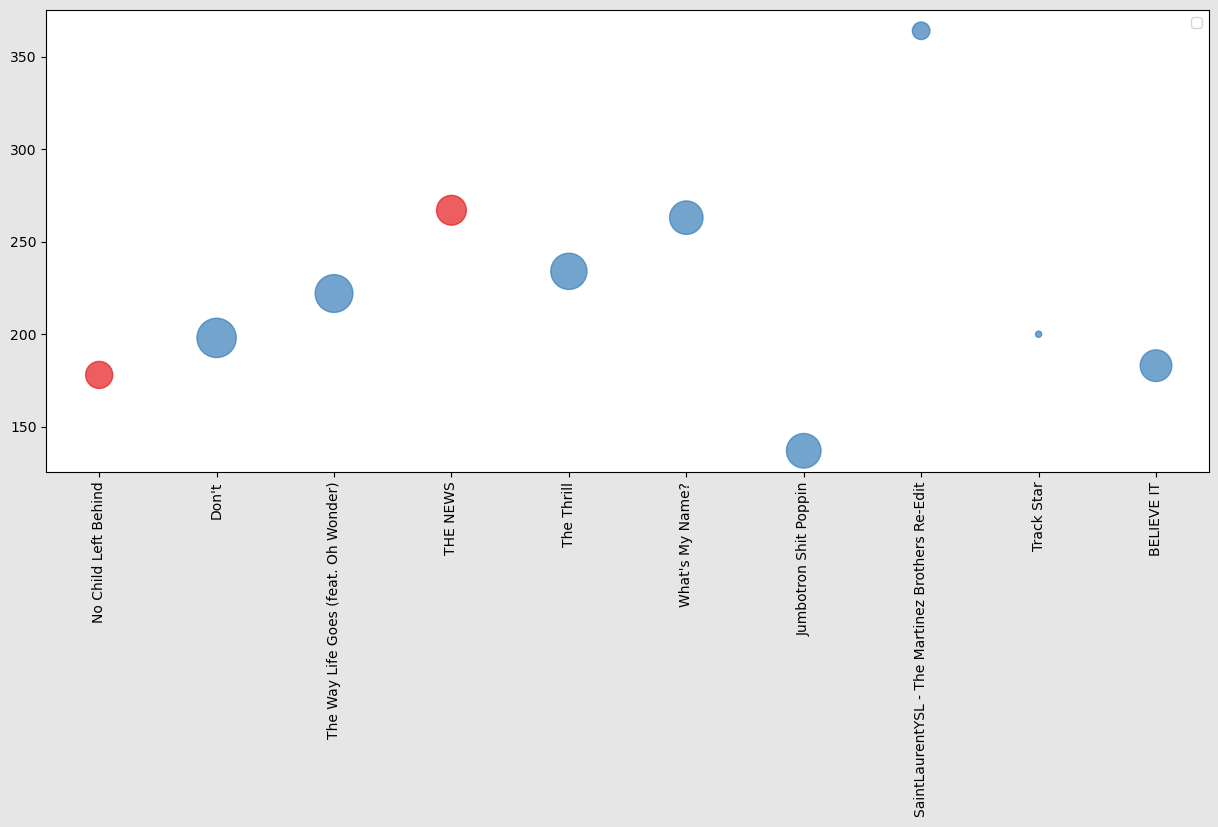

In [33]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = reco_df['name']
y = reco_df['duration_min']
s = reco_df['popularity_range']*20
    
color_labels = reco_df['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=reco_df['explicit'].map(color_map))
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()